# KDE peak properties (kdepeakprops)
---------
## Brief description

A module to get some basic properties of a KDE peak: peak location, FWHM and<br>
its upper and lower bounds. The KDE is estimated with sklearn.neighbors.KernelDensity.

<code>kdepeakprops.kde_props</code> takes a 1D array of values and returns an<br>
array with the KDE peak properties (value, FWHM, upp, low) and another (2D array)
with the KDE samples.

--------
## Install
<code>
cd /path/to/install/dir
git clone https://github.com/iskren-y-g/kdepeakprops.git</code><br>
Add path or<br>
<code>
> import sys
> sys.path.insert(0,'/path/to/install/dir')</code>

--------
## Example:

Some imports first:

In [1]:
import numpy as np
from matplotlib import pyplot as plt

import kdepeakprops as kpp

## Generate some test data and plot it

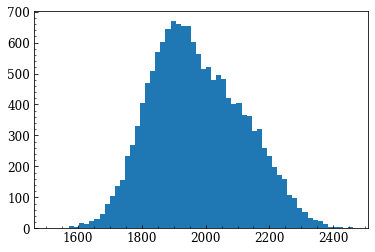

In [2]:
np.random.seed(42)
x = np.append(np.random.normal(1900, 100, size=10000),
              np.random.normal(2120, 100, size=5000))

fig,ax = plt.subplots()
_ = ax.hist(x, bins=60)

--------
## Calculate the FWHM of the KDE peak

### Use the auto plotting feature

KDE estimation with Gaussian kernel width = 15.919
KDE peak = 1916.009 +235.197, -130.984


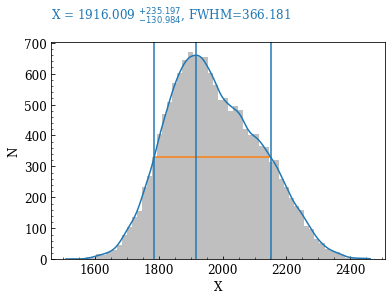

In [3]:
kde_peak_prop,kde_xy = kpp.kde_props(x, nbins=60, show=True)

-------
### Plot the result manually

KDE estimation with Gaussian kernel width = 15.919
KDE peak = 1916.009 +235.197, -130.984


Text(0, 0.5, 'N')

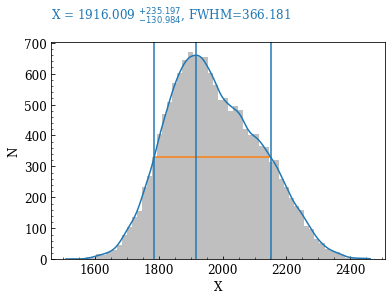

In [4]:
kde_peak_prop,kde_xy = kpp.kde_props(x, nbins=60, show=False)
peak, fwhm, hwhm_upp, hwhm_low = kde_peak_prop

label = r'X = {:.3f} $^{{+{:.3f}}}_{{-{:.3f}}}$, FWHM={:.3f}'.format(
    peak,hwhm_upp-peak,peak-hwhm_low, fwhm)

fig,ax = plt.subplots()
_ = ax.hist(x, bins=60, color='grey', alpha =.5)
ax.axvline(peak, color='C0')
ax.axvline(hwhm_low, color='C0')
ax.axvline(hwhm_upp, color='C0')
ax.hlines(kde_xy[1][kde_xy[1].argmax()]/2, 
          hwhm_low, hwhm_upp, color='C1')
ax.plot(kde_xy[0], kde_xy[1], '-', color='C0')
ax.text(ax.get_xlim()[0],
        ax.get_ylim()[1]*1.1, '{:s}'.format(label), color='C0')
ax.set_xlabel('X')
ax.set_ylabel('N')


---------

## An example with another test data

Load test data as numpy array

In [5]:
import pickle
filename = 'test/data/example_sample.pickle'
with open(filename, 'rb') as f:
    x = pickle.load(f)

Print basic stats of the test data

Using 'doane' metod to diplay 21 bins.
KDE estimation with Gaussian kernel width = 0.069
KDE peak = -1.615 +0.313, -0.156


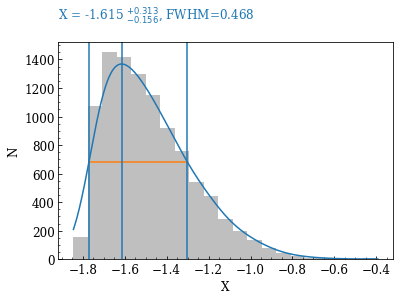

In [6]:
_,_ = kpp.kde_props(x, show=True)


### Different example data

In [7]:
filename = 'test/data/example_data2.pickle'
with open(filename, 'rb') as f:
    x = pickle.load(f)

In [8]:
print('len = {:}, min = {:.2f}, max = {:.2f}\n 16%,50%,84% = {:}\n std_mean = {:}\
'.format(len(x), x.min(), x.max(), np.percentile(x,[15.9,50,84.1]), 
         x.std()/np.sqrt(len(x))
                                                                       )
     )

len = 10000, min = 128.75, max = 253418.62
 16%,50%,84% = [  990.73092484  3579.07433514 17294.38213141]
 std_mean = 167.9843211320867


Plot it

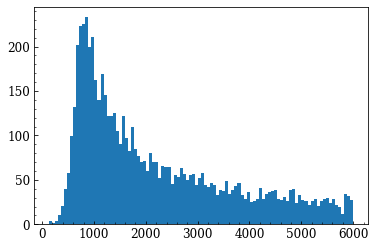

In [9]:
_ = plt.hist(x[x<6000],bins=100)

Analyse it with fwhm_from_kde

KDE estimation with Gaussian kernel width = 58.707
KDE peak = 816.313 +611.168, -229.188


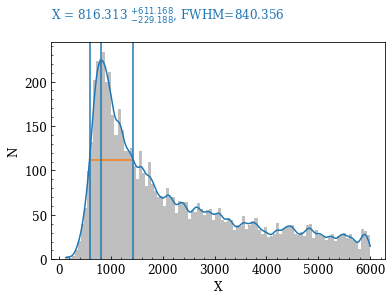

In [10]:
_,_ = kpp.kde_props(x[x<6000], nbins=100, show=True)
